# Tugas Pemrograman 2 Fuzzy Kelompok 6 IF-43-07

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel'restoran.xlsx)

In [6]:
df.head()

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


In [7]:
pelayanan = df['pelayanan']

In [8]:
makanan = df['makanan']

# Membership

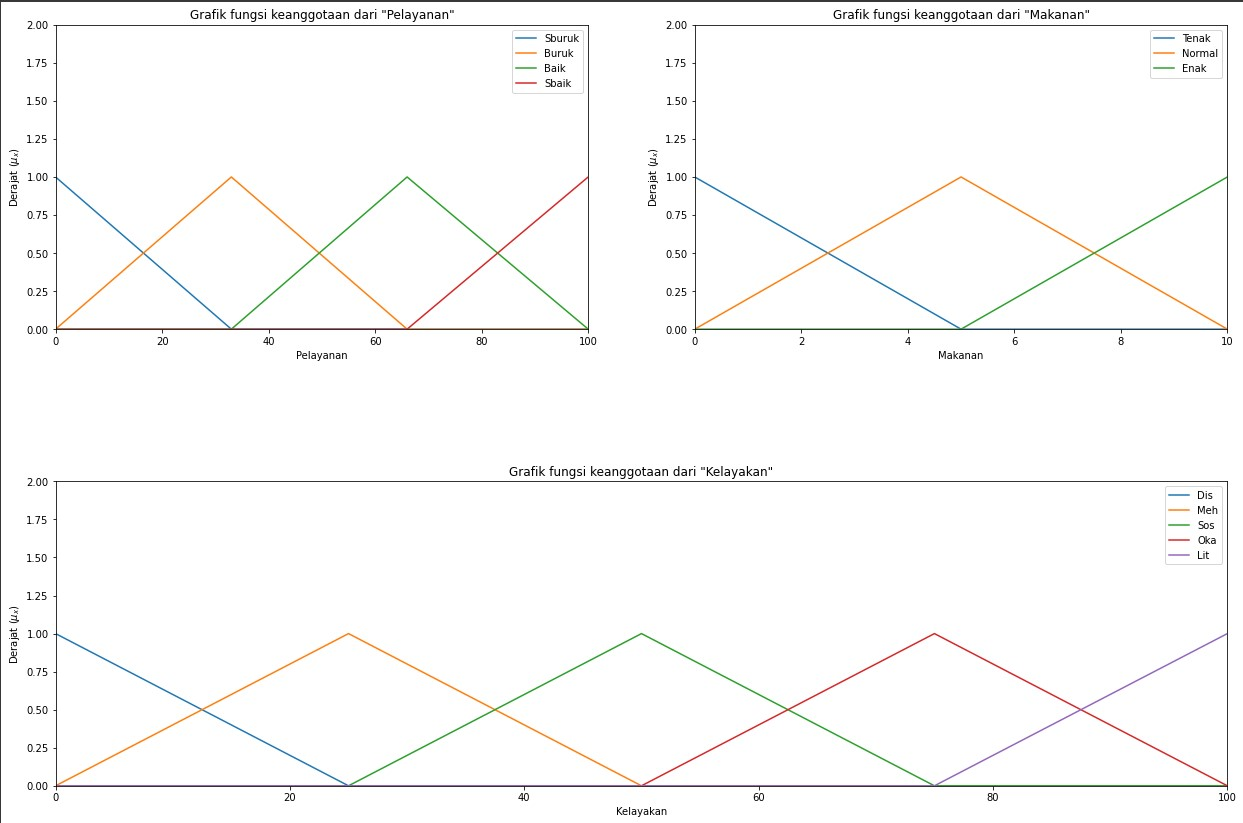

In [9]:
def trapezoidal(x, a, b, c , d):
    if a < x < b:
        return (x - a) / (b - a)
    if b <= x <= c:
        return 1
    if c < x <= d:
        return (d - x) / (d - c)
    return 0
    
def triangular(x, a, b, c):
    return trapezoidal(x, a, b, b, c)
    
def linear_up(x, a, b):
    return triangular(x, a, b, b)

def linear_down(x, a, b):
    return triangular(x, a, a, b)

# Fuzzification Pelayanan

### Pelayanan
1. Sangat buruk (sBuruk) {0, 0, 33}
2. Buruk (buruk) {0, 33, 66}
3. Baik (baik) {33, 66, 100}
4. Sangat Baik (sBaik) {66, 100, 100}

In [10]:
n = len(pelayanan)
arrSBuruk = [0]*n
arrBuruk = [0]*n
arrBaik = [0]*n
arrSBaik = [0]*n
for i in range(n):
    sBuruk = linear_down(pelayanan[i], 0, 33)
    buruk = triangular(pelayanan[i], 0, 33, 66)
    baik = triangular(pelayanan[i], 33, 66, 100)
    sBaik = linear_up(pelayanan[i], 66, 100)
    
    arrSBuruk[i] = sBuruk
    arrBuruk[i] = buruk
    arrBaik[i] = baik
    arrSBaik[i] = sBaik

# Fuzzification Makanan

### Makanan
1. Tidak enak (tEnak) {0, 0, 5}
2. Normal (normal) {0, 5, 10}
3. Enak (enak) {5, 10, 10}

In [11]:
m = len(makanan)
arrTEnak = [0]*m
arrNormal = [0]*m
arrEnak = [0]*m
for i in range(m):
    tEnak = linear_down(makanan[i], 0, 5)
    normal = triangular(makanan[i], 0, 5, 10)
    enak = linear_up(makanan[i], 5, 10)
    
    arrTEnak[i] = tEnak
    arrNormal[i] = normal
    arrEnak[i] = enak

# Fuzzy Inference and Defuzzification

# Rules (Kelayakan)
1. disappointing {0, 0, 30}
2. meh {0, 30, 50}
3. soso {30, 50, 70}
4. okay {50, 70, 100}
5. lit {70, 100, 100}

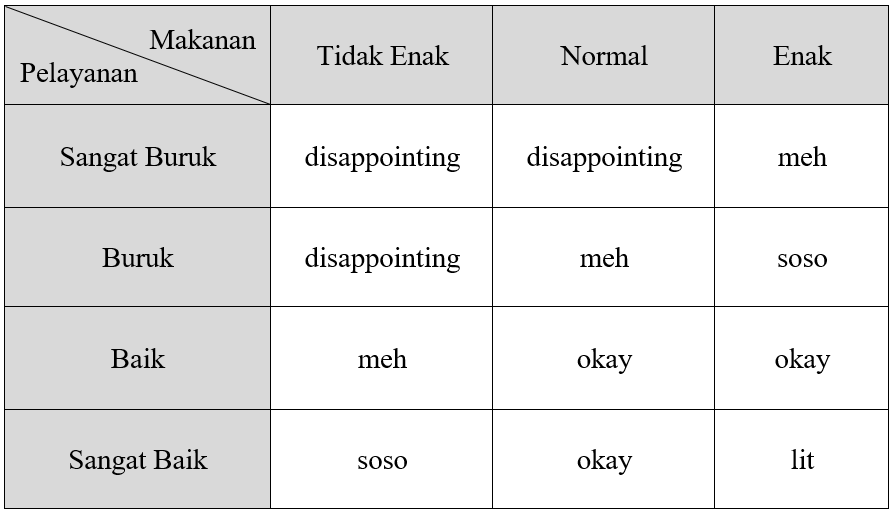

In [12]:
def inference(l, serv, food):
    if serv != 0:
        if food != 0:
            result = min(serv, food)
            l.append(result)

In [13]:
#Inference
disappointing = []
meh = []
soso = []
okay = []
lit = []

hasil = [0]*100

for i in range(len(df)):
    inference(disappointing, arrSBuruk[i], arrTEnak[i])
    inference(disappointing, arrSBuruk[i], arrNormal[i])
    inference(disappointing, arrBuruk[i], arrTEnak[i])
    
    inference(meh, arrSBuruk[i], arrEnak[i])
    inference(meh, arrBuruk[i], arrNormal[i])
    inference(meh, arrBaik[i], arrTEnak[i])
    
    inference(soso, arrSBaik[i], arrTEnak[i])
    inference(soso, arrBuruk[i], arrEnak[i])
    
    inference(okay, arrBaik[i], arrNormal[i])
    inference(okay, arrSBaik[i], arrNormal[i])
    inference(okay, arrBaik[i], arrEnak[i])
    
    inference(lit, arrSBaik[i], arrEnak[i])
    
    garisDis = max(disappointing) if len(disappointing) > 0 else 0
    garisMeh = max(meh) if len(meh) > 0 else 0
    garisSos = max(soso) if len(soso) > 0 else 0
    garisOka = max(okay) if len(okay) > 0 else 0
    garisLit = max(lit) if len(lit) > 0 else 0
    
    
#Defuzzification    
    pembilang = penyebut = 0
    j = 0
    while j < 100:
        tinggiDis = min(garisDis, linear_down(j, 0, 25))
        tinggiMeh = min(garisMeh, triangular(j, 0, 25, 50))
        tinggiSos = min(garisSos, triangular(j, 25, 50, 75))
        tinggiOka = min(garisOka, triangular(j, 50, 75, 100))
        tinggiLit = min(garisLit, linear_up(j, 75, 100))
        tinggiFusion = max(tinggiDis, tinggiMeh, tinggiSos, tinggiOka, tinggiLit)
        pembilang += j * tinggiFusion
        penyebut += tinggiFusion
        j += 0.01
    
    try:
        hasil[i] = pembilang / penyebut
    except ZeroDivisionError:
        hasil[i] = 0
      
    disappointing.clear()
    meh.clear()
    soso.clear()
    okay.clear()
    lit.clear()

# Hasil

In [14]:
result = pd.DataFrame(hasil)
result.columns = ['hasil']
id = [i for i in range(1, len(result)+1)]
result['id'] = id

In [15]:
rank = pd.merge(df, result, how = 'inner', on = 'id')
rank.sort_values(['hasil'], ascending = False, inplace=True)

In [16]:
rank.head(10)

,id,pelayanan,makanan,hasil
41,42,94,10,84.302115
23,24,100,9,83.623598
78,79,87,9,79.676293
68,69,86,10,79.201653
21,22,79,9,76.718341
69,70,78,8,76.520862
62,63,78,7,76.520862
30,31,74,9,75.654743
15,16,82,6,75.583172
59,60,79,6,75.532942


In [19]:
rank[:10].to_excel('peringkat.xlsx')

In [15]:
rank.to_excel('peringkat_semua.xlsx')

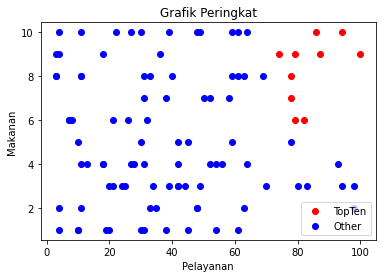

In [20]:
plt.figure(1)
plt.title('Grafik Peringkat')
plt.xlabel('Pelayanan')
plt.ylabel('Makanan')
for i in range(100): 
    data = rank.iloc[i]
    plt.scatter(data['pelayanan'], data['makanan'], color='r' if i < 10 else 'b' , label='TopTen' if i == 0 else ('Other' if i == 10 else None))
plt.legend()
plt.show()